In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('static_partitioning_benchmark_results.csv')
df['KeyRange'] = df['KeyRange'].astype(int)

sns.set_theme(style="whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 11,
    'figure.figsize': (10, 6)
})

def get_system_agg(df, metric):
    sys_df = df[df['RecordType'] == 'System'].copy()
    return sys_df.groupby('KeyRange')[metric].agg(['mean', 'std']).reset_index()

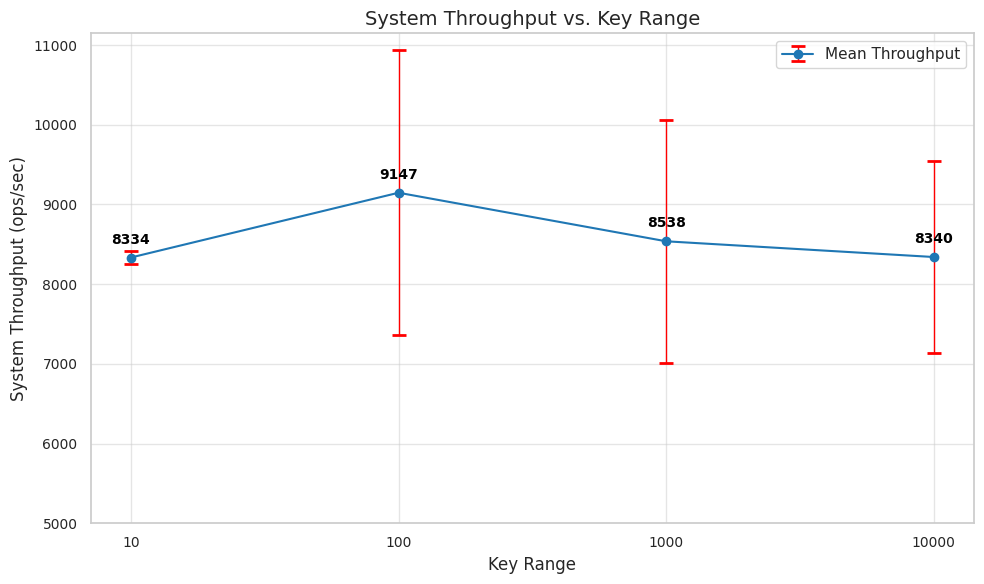

In [3]:
plt.figure()
data = get_system_agg(df, 'Throughput')

plt.errorbar(data['KeyRange'], data['mean'], yerr=data['std'], 
                 fmt='-o', capsize=5, capthick=2, elinewidth=1, 
                 color='#1f77b4', ecolor='red', 
                 label='Mean Throughput')

for i, row in data.iterrows():
        plt.annotate(f"{row['mean']:.0f}", 
                     (row['KeyRange'], row['mean']),
                     textcoords="offset points", xytext=(0, 10), 
                     ha='center', fontsize=10, fontweight='bold', color='black')

# Formatting
plt.xscale('log')
plt.ylim(bottom=5000, top=data['mean'].max() + 2000)
plt.xlabel('Key Range')
plt.ylabel('System Throughput (ops/sec)')
plt.title('System Throughput vs. Key Range')
plt.xticks([10, 100, 1000, 10000], ['10', '100', '1000', '10000'])
plt.minorticks_off()
plt.grid(True, which="major", ls="-", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

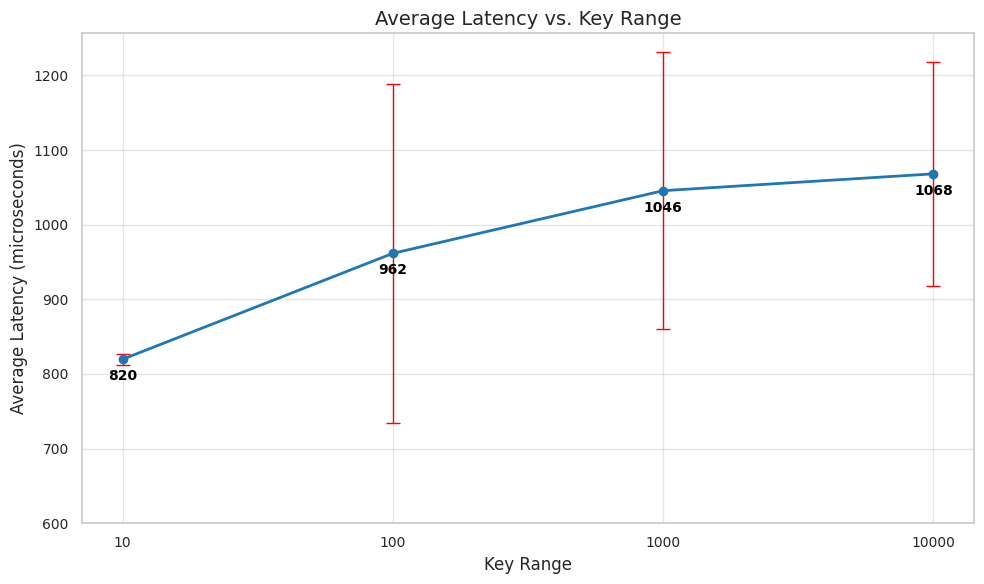

In [7]:
plt.figure()
data = get_system_agg(df, 'Latency')

plt.errorbar(data['KeyRange'], data['mean'], yerr=data['std'], 
                 fmt='-o', linewidth=2, capsize=5, capthick=1, elinewidth=1, 
                 color='#1f77b4', ecolor='red', label='Mean Latency')

for i, row in data.iterrows():
        plt.annotate(f"{row['mean']:.0f}", 
                     (row['KeyRange'], row['mean']),
                     textcoords="offset points", xytext=(0, -15), 
                     ha='center', fontsize=10, fontweight='bold', color='black')

plt.xscale('log')
plt.ylim(bottom=600)
plt.xlabel('Key Range')
plt.ylabel('Average Latency (microseconds)')
plt.title('Average Latency vs. Key Range')
plt.xticks([10, 100, 1000, 10000], ['10', '100', '1000', '10000'])
plt.minorticks_off()
plt.grid(True, which="major", ls="-", alpha=0.5)
plt.tight_layout()
plt.show()

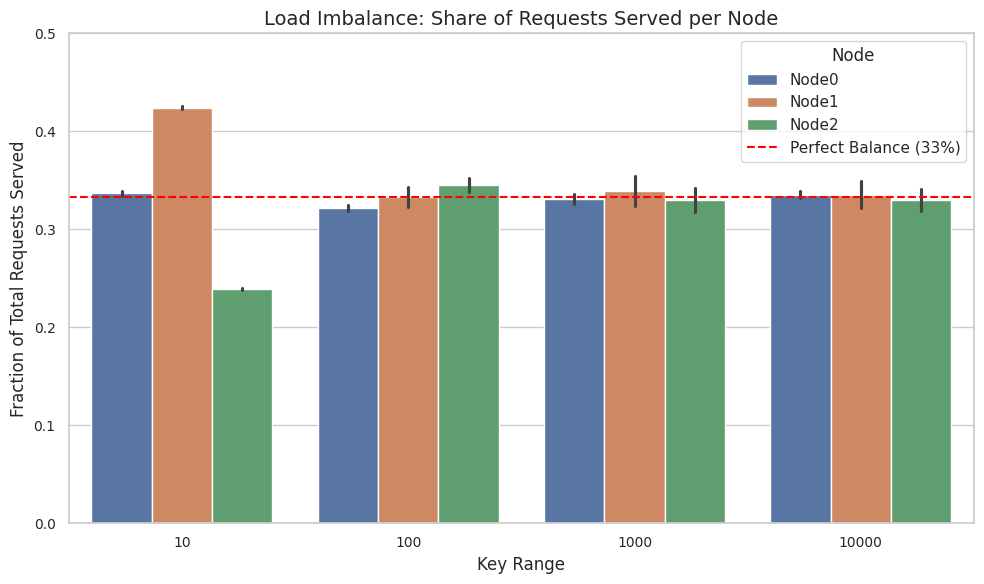

In [5]:
plt.figure()

node_df = df[df['RecordType'].str.startswith('Node')].copy()
node_df['Load'] = node_df['ServerGets'] + node_df['ServerPuts']
run_totals = node_df.groupby(['KeyRange', 'Run'])['Load'].sum().reset_index()
run_totals.rename(columns={'Load': 'TotalRunLoad'}, inplace=True)
node_df = pd.merge(node_df, run_totals, on=['KeyRange', 'Run'])
node_df['LoadFraction'] = node_df['Load'] / node_df['TotalRunLoad']

sns.barplot(data=node_df, x='KeyRange', y='LoadFraction', hue='RecordType', errorbar='sd')

plt.axhline(1/3, color='red', linestyle='--', label='Perfect Balance (33%)')

plt.title('Load Imbalance: Share of Requests Served per Node')
plt.xlabel('Key Range')
plt.ylabel('Fraction of Total Requests Served')
plt.legend(title='Node')
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()